___
# PROJETO 3

## GRUPO:
### Gabriel Noal
### Warlen Rodrigues
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Documents\INSPER\Ciencia dos Dados\DP\CD1S17\Projeto 3 Entrega Final


1. a) Definindo a distribuição Lognormal.
   
   b) Sorteando os valores...

In [2]:
dados = sorted(stats.lognorm.rvs(0.25,scale=20,loc=10,size=1000000))

df = pd.DataFrame()
df["dados"] =dados

___
## Estudo da Distribuição da Média Amostral  $\bar{X}$  via SIMULAÇÃO

1. c) Calculando média, variância e Desvio-Padrão

In [3]:
print("Média:",round(df.dados.mean(),2))
print("Variancia:",round(df.dados.var(),2))
print("Desvio Padrão:",round(df.dados.std(),2))

Média: 30.64
Variancia: 27.55
Desvio Padrão: 5.25


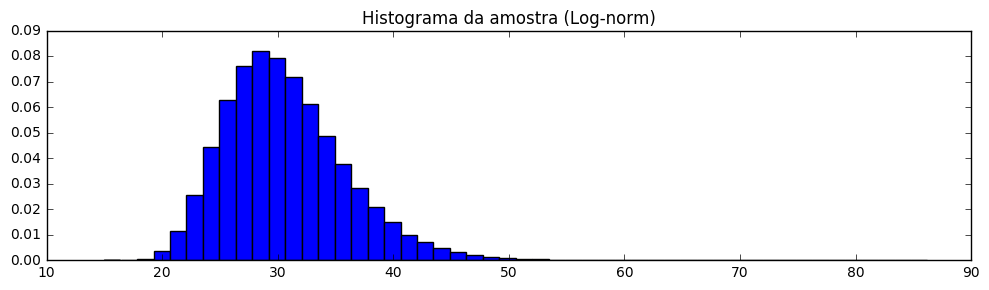

In [14]:
fig = plt.figure(figsize=(10,3))

plt.subplot(111)

plt.hist(df.dados,bins=50,normed=1)
plt.title("Histograma da amostra (Log-norm)")


plt.tight_layout()
plt.show()

Criando função que gera as distribuições das médias amostrais.

In [5]:
def medias_amostrais(n):
    lista=[]
    for i in range (n):
        lista.append(np.random.choice(df.dados))
    media = sum(lista)/n
    #print("Quando n={0}, a média é:{1}".format(n,media))
    return media

Considerando n=2

In [6]:
medias_2 = []
for i in range (10000):
    medias_2.append(medias_amostrais(2))


Considerando n=4

In [7]:
medias_4 = []
for i in range (10000):
    medias_4.append(medias_amostrais(4))


Considerando n=20

In [8]:
medias_20 = []
for i in range (10000):
    medias_20.append(medias_amostrais(20))

Considerando n=50

In [9]:
medias_50 = []
for i in range (10000):
    medias_50.append(medias_amostrais(50))


30.564392325185374
13.55913388942741


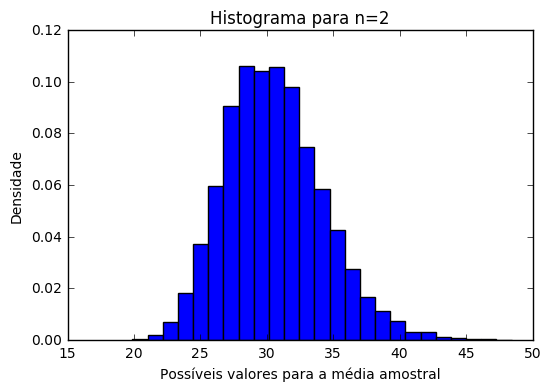

In [10]:
media = pd.DataFrame()
media["n2"] = medias_2
media["n4"] = medias_4
media["n20"] = medias_20
media["n50"] = medias_50

plt.hist(media.n2,bins=25,normed=1)
plt.title("Histograma para n=2")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")


print(media.n2.mean())
print(media.n2.var())


30.6613708934603
6.986491197082561


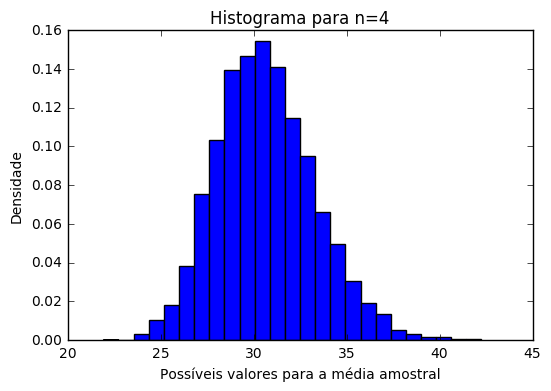

In [11]:
plt.hist(media.n4,bins=25,normed=1)
plt.title("Histograma para n=4")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

print(media.n4.mean())
print(media.n4.var())

30.636283091329037
1.369564782064872


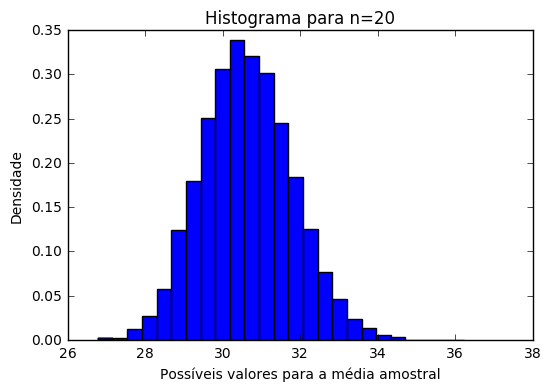

In [12]:
plt.hist(media.n20,bins=25,normed=1)
plt.title("Histograma para n=20")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

print(media.n20.mean())
print(media.n20.var())

30.65087939162956
0.5482600386861343


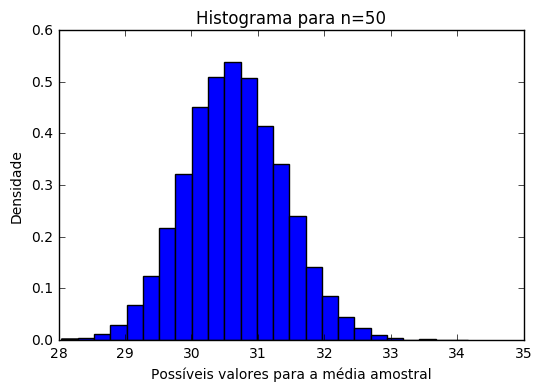

In [13]:
plt.hist(media.n50,bins=25,normed=1)
plt.title("Histograma para n=50")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")
print(media.n50.mean())
print(media.n50.var())

O TLC nos mostra que a distribuição das médias amostrais se comporta de modo que, quanto maior for o "n", mais a distribuição das médias se parece com uma normal. Ou seja, quanto mais valores pegarmos dentro das médias populacionais, maior é a probabilidade de a nossa média amostral ser igual à média escolhida para ser aplicada ao modelo teórico escolhido. 

Por exemplo: no item 1. a) tinhamos uma média de 30.64. É possível perceber que as médias das distribuições obtidas para diferentes valores de n se aproxima bastante de 30.64 a medida que n vai recebendo valores mais altos.

In [19]:
x3 =[]
x15=[]
for i in range (10000):
    medias = []
    for i in range (20):
        medias.append(medias_amostrais(50))
    x15.append(medias[14])
    x3.append(medias[2])


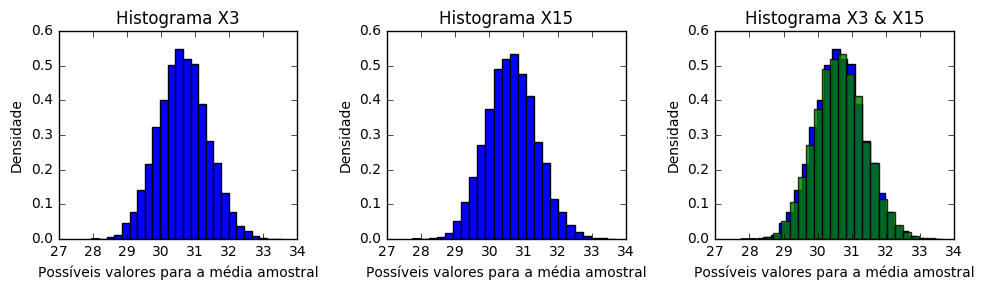

In [30]:
fig = plt.figure(figsize=(10,3))

plt.subplot(131)
plt.hist(x3,bins=25,normed=1)
plt.title("Histograma X3")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

plt.subplot(132)
plt.hist(x15,bins=25,normed=1)
plt.title("Histograma X15")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

plt.subplot(133)
plt.hist(x3,bins=25,normed=1,alpha=1)
plt.hist(x15,bins=25,normed=1,alpha=0.8)
plt.title("Histograma X3 & X15")
plt.xlabel("Possíveis valores para a média amostral")
plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

In [34]:
print("Média de X3:",np.mean(x3))
print("Média de X15:",np.mean(x15))
print("Variancia de X3:",np.var(x3))
print("Variancia de X15:",np.var(x15))

Média de X3: 30.6380341509
Média de X15: 30.6486482696
Variancia de X3: 0.532547317184
Variancia de X15: 0.547987074222


In [43]:
print("Correlação(X3,X15):",np.corrcoef(x3,x15)[0][1])

Correlação(X3,X15): 0.0156466437809


___
## Estudo da Distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ via SIMULAÇÃO